<a href="https://colab.research.google.com/github/AshwinUniyal/ML_Project/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. tabular dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
!pip install pmlb
from pmlb import fetch_data
from sklearn.linear_model import LinearRegression


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
data = fetch_data('fars')
print(data.describe())

          CASE_STATE            AGE            SEX    PERSON_TYPE  \
count  100968.000000  100968.000000  100968.000000  100968.000000   
mean       23.425977      37.106707       0.683880       3.155832   
std        15.228212      22.109641       0.498972       2.551538   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.000000      20.000000       0.000000       1.000000   
50%        22.000000      32.000000       1.000000       1.000000   
75%        38.000000      49.000000       1.000000       6.000000   
max        50.000000      99.000000       2.000000       9.000000   

       SEATING_POSITION  RESTRAINT_SYSTEM-USE  \
count     100968.000000         100968.000000   
mean           5.990700              6.400394   
std            4.794034              1.900097   
min            0.000000              0.000000   
25%            3.000000              5.000000   
50%            3.000000              7.000000   
75%            6.000000            

### checking freq of classes

In [ ]:
pd.value_counts(data.target)

1    42116
4    20007
2    15072
5    13890
6     8674
7      901
3      299
0        9
Name: target, dtype: int64

### under / over sampling may be required 

In [ ]:
X, y = fetch_data('fars', return_X_y = True)

In [ ]:
X.size

2928072

In [ ]:
y.size

100968

In [ ]:
X

array([[ 0, 34,  1, ..., 29, 19, 17],
       [ 0, 20,  1, ..., 29, 19, 17],
       [ 0, 43,  1, ..., 29, 19,  4],
       ...,
       [50,  7,  0, ..., 29, 19, 11],
       [50,  4,  0, ..., 29, 19, 11],
       [50, 61,  1, ..., 29, 19, 17]], dtype=int64)

In [ ]:
X[[0]]

array([[  0,  34,   1,   1,   3,   7,   2,   2,   9,   1,  16,   3,   2,
          9,  97,   3,   3,   5, 999,   2,   0,   2,   0,   5,   0,  27,
         29,  19,  17]], dtype=int64)

In [ ]:
data.iloc[1]

CASE_STATE                              0
AGE                                    20
SEX                                     1
PERSON_TYPE                             1
SEATING_POSITION                        3
RESTRAINT_SYSTEM-USE                    7
AIR_BAG_AVAILABILITY/DEPLOYMENT         9
EJECTION                                2
EJECTION_PATH                           9
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     0
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        1
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data.shape

(100968, 30)

### checking missing values in dataframe

In [ ]:
data.isnull().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE                         0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

### no missing values found. we are good to go

### FIND CORRELATIONS - one on one , Creating sns heatmap

<AxesSubplot:>

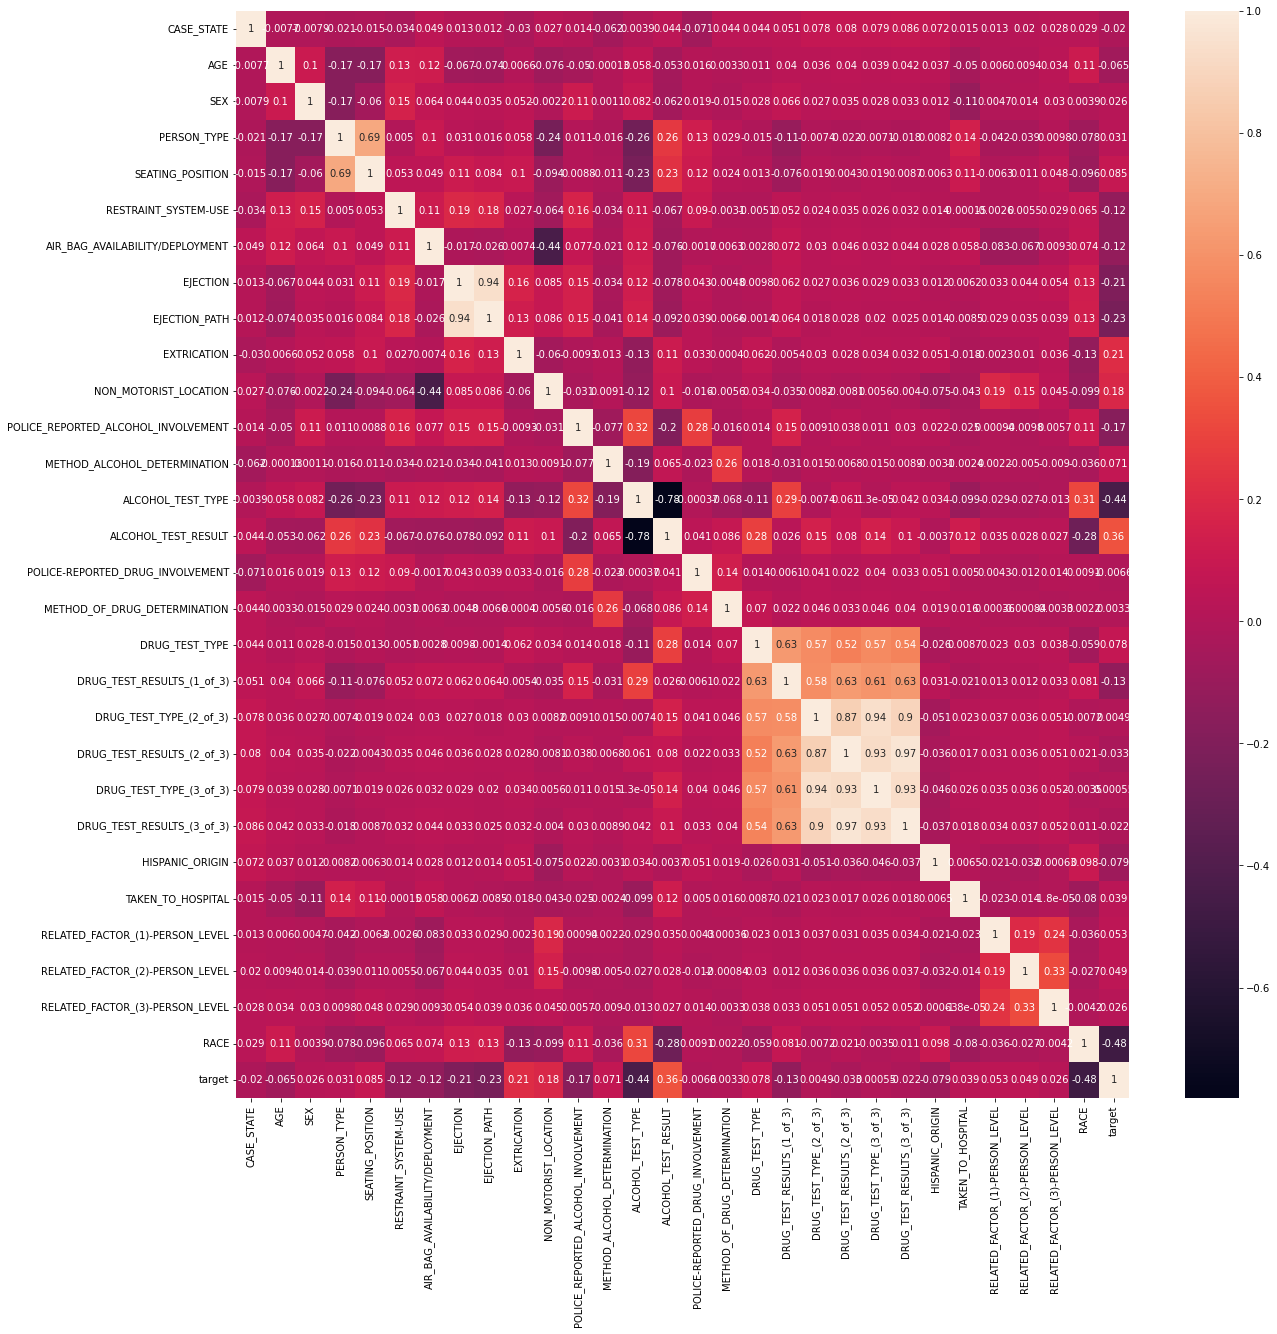

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
### race and alcohol test type are coming biggest factor for high severity of accidents

In [ ]:
### checking duplicates

dup_rows = data.duplicated(keep = False)
print(dup_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
100963    False
100964    False
100965    False
100966    False
100967    False
Length: 100968, dtype: bool


In [ ]:
dup_rows.size

100968

In [ ]:
data[data.duplicated(keep = 'first')]

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
69,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
126,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
170,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
173,0,32,0,1,3,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
225,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,49,20,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100542,49,32,0,1,3,5,9,0,0,1,...,0,2,0,6,2,27,29,19,11,2
100786,50,46,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100855,50,39,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4


In [ ]:
data_dup = data[data.duplicated(keep=False)]

dup_indexes = data_dup.groupby(list(data_dup)).apply(lambda x: tuple(x.index)).tolist()
print (dup_indexes)
[(1, 6), (2, 4), (3, 5)]

[(797, 1158), (31, 69, 225, 2084), (462, 792), (1159, 1173, 1965), (516, 518), (782, 1792), (1791, 1820), (459, 534), (50, 1745, 2106), (135, 974), (1209, 1212), (205, 2140), (485, 838, 2077), (1210, 1213), (1108, 1648), (1671, 1787), (454, 458), (460, 461), (1438, 1944), (1621, 1622), (362, 916), (1181, 2262), (1731, 1839), (229, 444, 1349), (184, 1836), (709, 1232, 1350, 1661), (1440, 1483), (586, 587), (897, 2120), (513, 1145), (463, 1337), (1116, 1508), (2113, 2115), (718, 927), (598, 1284), (1300, 2080), (1125, 1522), (332, 1551), (48, 1370, 1538), (1058, 1722), (417, 1443), (1494, 2044), (272, 1710), (62, 1421), (1611, 2058), (99, 254), (1069, 1094), (1330, 1397), (174, 1110), (400, 561), (20, 673, 854, 1063), (1429, 1668), (220, 562), (883, 1055), (52, 296), (107, 173), (437, 557, 599), (650, 695, 1075, 2149), (738, 822), (29, 969), (431, 2050), (44, 1803), (2078, 2249), (397, 1259, 2196), (850, 1025), (563, 1135), (303, 1113, 1995), (5, 2233), (530, 1523, 1909), (288, 450, 1072

[(1, 6), (2, 4), (3, 5)]

In [ ]:
data.iloc[31,]

CASE_STATE                              0
AGE                                     1
SEX                                     1
PERSON_TYPE                             6
SEATING_POSITION                       16
RESTRAINT_SYSTEM-USE                    1
AIR_BAG_AVAILABILITY/DEPLOYMENT         4
EJECTION                                0
EJECTION_PATH                           0
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     1
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        2
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data_dup.shape

(12768, 30)

In [ ]:
data.shape

(100968, 30)

In [ ]:
data_dup_removed = data.drop_duplicates()

In [ ]:
data_dup_removed.shape

(93004, 30)

### 7964 duplicate rows have been deleted

In [ ]:
data.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [ ]:
df = data_dup_removed
X = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

In [ ]:
X.shape

(93004, 29)

In [ ]:
y.shape

(93004, 1)

In [ ]:
X.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,0,34,1,1,3,7,2,2,9,1,...,2,0,2,0,5,0,27,29,19,17
1,0,20,1,1,3,7,9,2,9,1,...,2,0,2,0,5,0,27,29,19,17
2,0,43,1,1,3,5,4,0,0,0,...,2,0,2,0,5,0,27,29,19,4
3,0,38,0,6,6,5,4,0,0,0,...,2,0,2,0,6,2,27,29,19,11
4,0,50,1,1,3,5,9,0,0,1,...,2,0,2,0,5,2,27,29,19,4


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,2
4,1


In [ ]:
## scaing X

X = preprocessing.scale(X)
print(X)

#converting y from df to np array
y = y.to_numpy()

[[-1.55191214 -0.12337961  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214 -0.78029424  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214  0.29892265  0.69723851 ...  0.04126579  0.00292968
  -2.71789847]
 ...
 [ 1.75462623 -1.39028639 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623 -1.53105381 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623  1.14352717  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]]


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Shuffling the dataset

In [ ]:
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = X[shuffled_indices]
shuffled_targets = y[shuffled_indices]

### Splitting train, test


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(65102, 29)
(27902, 29)
(65102, 1)


In [ ]:
y_train = y_train.flatten() #collapsing dimensions into 1 D

# building model

## decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=5, min_samples_leaf=1)   
DTclf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.4f}'.format(DTclf_model.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.4f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.7757
Accuracy of Decision tree classifier on test set: 0.7710


### optimising Decision tree using gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes': [3, 7, 10, 30, 40], 
          'min_samples_split': [4, 6, 8, 10],
          'max_depth':[4,5,6,7,8,10,13,15,20]}

DTclf_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv= 5, verbose = 2, return_train_score = True)
DTclf_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_s

[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_l

[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=6, max_le

[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=7, max_le

[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_le

[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, 

[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=15, 

[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 13, 15, 20],
                         'max_leaf_nodes': [3, 7, 10, 30, 40],
                         'min_samples_split': [4, 6, 8, 10]},
             return_train_score=True, verbose=2)

In [ ]:
DTclf_model.best_score_

0.7919879690977744

In [ ]:
DTclf_model.best_estimator_

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40, min_samples_split=4)

## DECISION TREE : Initial best accuracy obtained is 79.19%

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_leaf_nodes=None,min_samples_split=2)  
rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_test, y_test)
print(score)

0.7608773564619024


## optimising random forest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(X_train, y_train)

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)

NameError: ignored

In [ ]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.79
Accuracy of Random Forest classifier on test set: 0.78


 # Dataset 2: CIFARTile

### Data augmentation intro

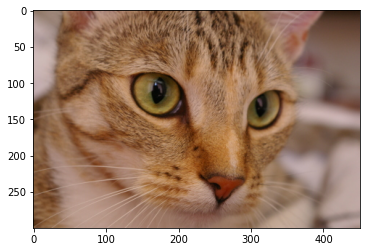

In [ ]:
from skimage import data

im = data.chelsea()

plt.imshow(im)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=25,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
# im.shape

# x = x.reshape((1,) + (x.shape[2],) +(x.shape[0],) +(x.shape[1],) )
# x.shape

(300, 451, 3)

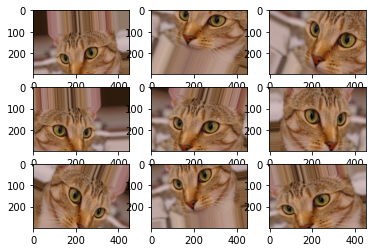

In [ ]:
def plot9(imageFlow):
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
  	# generate batch of images
    batch = imageFlow.next()
	  # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # add image to the set. We squeeze the image here as it may be a batch of images
    plt.imshow(np.squeeze(image))
  # display the 9 images
  plt.show()

im = im.reshape((1,) + im.shape)

img_iter = datagen.flow(im, batch_size=1)

plot9(img_iter)

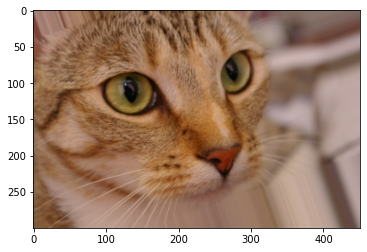

In [ ]:
im = data.chelsea()
im = im.reshape((1,) + im.shape)


datagen=ImageDataGenerator(rotation_range=20)
iter=datagen.flow(im,batch_size=2)
batch=iter.next()
plt.imshow(batch[0].astype('uint8'))

In [ ]:
batch.shape

(1, 300, 451, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/train_x.npy", allow_pickle=True)

In [ ]:
train_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/train_y.npy", allow_pickle=True)

In [ ]:
validate_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/valid_x.npy", allow_pickle=True)

In [ ]:
validate_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/valid_y.npy", allow_pickle=True)

In [ ]:
test_X = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/test_x.npy", allow_pickle=True)

In [ ]:
test_y = np.load("/content/drive/MyDrive/ML_coursework_CIFARTile_data/test_y.npy", allow_pickle=True)

## Example image

In [ ]:

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_example(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    plt.show()

In [ ]:
import random

count = train_X.shape[0]

ri = random.randrange(count)
show_example(train_X[ri], train_y[ri])

In [ ]:
unq, counts = np.unique(train_y, return_counts= True)
print(np.asarray((unq, counts)).T)

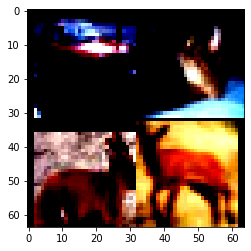

In [ ]:
fig = plt.figure()
m = fig.add_subplot()
m.imshow(np.moveaxis(train_X[50],0,-1))






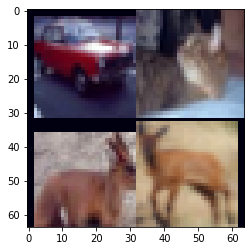

In [ ]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())
fig = plt.figure()
m = fig.add_subplot()
m.imshow(image_normalization(np.moveaxis(train_X[50],0,-1)))


In [ ]:
train_X[50].max()

2.1267905

Sample classes looks equally distributed

In [ ]:
train_X.shape

(45000, 3, 64, 64)

In [ ]:
train_nsample, train_nrgb, train_nx,train_ny = train_X.shape

In [ ]:
train_X2 = train_X.reshape(train_nsample, train_nrgb*train_nx*train_ny)

In [ ]:
test_nsample, test_nrgb, test_nx,test_ny = test_X.shape

In [ ]:
test_X2 = test_X.reshape(test_nsample, test_nrgb*test_nx*test_ny)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()  
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])
score = rf_clf.score(train_X2[0:1000,:], train_y[0:1000])
print(score)

In [ ]:
test_score = rf_clf.score(test_X2, test_y)
print(test_score)

CV optimising

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100,200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(train_X2[0:1000,:],train_y[0:1000])

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)


In [ ]:
rf_clf

In [ ]:
pred = rf_clf.predict(test_X2)

In [ ]:
rf_clf.score(test_X2,test_y)

In [ ]:
rf2 = RandomForestClassifier(n_estimators =100, max_depth=7, max_features='log2')
rf2.fit(train_X2,train_y)

rf2.score(test_X2,test_y)

optimised accuracy on test set = 28.97%

# SVM model

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_X2[0:5000,:], train_y[0:5000])

SVC()

In [ ]:
svm_clf.score(train_X2[0:5000,:], train_y[0:5000])

0.8392

In [ ]:
svm_clf.score(test_X2, test_y)

0.2828

# CNN model for classification

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
#train_X /= 255
train_X.shape

(45000, 3, 64, 64)

In [ ]:
train_X = image_normalization(train_X)
validate_X = image_normalization(validate_X)
test_X = image_normalization(test_X)

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = True

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
validate_y = keras.utils.to_categorical(validate_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [ ]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_X.shape[1:], data_format='channels_first'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 64, 64)        896       
                                                                 
 activation (Activation)     (None, 32, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 62, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 30, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 31, 32)        0         
                                                        

# ERROR |  ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d
### https://stackoverflow.com/questions/72413321/valueerror-one-of-the-dimensions-in-the-output-is-0-due-to-downsampling-in-c/72742906

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
validate_X.shape

(15000, 3, 64, 64)

In [ ]:
batch_size = 32
###########################################
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train_X, train_y,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(validate_X, validate_y),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_X)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(train_X, train_y,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(validate_X,validate_y),
                                    workers=4)

Using real-time data augmentation.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1874: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (45000, 3, 64, 64) (64 channels).
  warnings.warn('Expected input to be images (as Numpy array) '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:680: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (45000, 3, 64, 64) (64 channels).
  warnings.warn('NumpyArrayIterator is set to use the '
<ipython-input-24-24625c4496d4>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_X, t

Epoch 1/100


InvalidArgumentError: ignored

In [ ]:
pred = model.predict(test_X)

In [ ]:
scores = model.evaluate(test_X, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored

Epoch 95/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7692 - accuracy: 0.6927 - val_loss: 1.5744 - val_accuracy: 0.2856

Epoch 96/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7678 - accuracy: 0.6951 - val_loss: 1.6140 - val_accuracy: 0.2910

Epoch 97/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7639 - accuracy: 0.6998 - val_loss: 1.5469 - val_accuracy: 0.2825

Epoch 98/100
313/313 [==============================] - 6s 19ms/step - loss: 0.7550 - accuracy: 0.7037 - val_loss: 1.5854 - val_accuracy: 0.2806

Epoch 99/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7414 - accuracy: 0.7056 - val_loss: 1.6917 - val_accuracy: 0.2838

Epoch 100/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7398 - accuracy: 0.7092 - val_loss: 1.6005 - val_accuracy: 0.2835

Test loss: 1.6726701259613037 Test accuracy: 0.2858999967575073


>>2 ON FIRST 2 CONV layer of 64 64 i am getting last epoch accuracy of 45 val_acc 29  || test accuracy 31%


>>3 learning rate 0.001 instead 0.0001 | 51 accuracy, val  acc 28 % | test accuracy 29.3%

>>4 WITH DATA AUGMENTATION, batch_size = 100, train_x[10,000], val5000

Epoch 98/100
100/100 [==============================] - 49s 472ms/step - loss: 1.3358 - accuracy: 0.3438 - val_loss: 1.3914 - val_accuracy: 0.3138

Epoch 99/100
100/100 [==============================] - 49s 475ms/step - loss: 1.3325 - accuracy: 0.3460 - val_loss: 1.3666 - val_accuracy: 0.3080

Epoch 100/100
100/100 [==============================] - 50s 470ms/step - loss: 1.3325 - accuracy: 0.3500 - val_loss: 1.3597 - val_accuracy: 0.3166

Test loss: 1.3803764581680298
Test accuracy: 0.30809998512268066

# 3 Tweets text analysis| Sentiment

In [63]:
# nltk
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
import pandas as pd

df_train = pd.read_csv('/content/Tweets_train.csv')
df_val = pd.read_csv('/content/Tweets_dev.csv')
df_test = pd.read_csv('/content/Tweets_test (1).csv', encoding='latin-1')

In [36]:
df_train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [37]:
df_train.iloc[11377,1]

'@SouthwestAir is this a joke? My return flight is delayed too! 3 in a row! New record from you guys 💔😪'

In [38]:
df_train.iloc[4,1]

"@JetBlue I'm #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW"

## Cleaning username and url 

In [39]:
import re
def cleaning_URLs(data):
  data = re.sub('@[^\s]+','',data)
  return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', data)


df_train['text'] = df_train['text'].apply(lambda x: cleaning_URLs(x))
df_val['text'] = df_val['text'].apply(lambda x: cleaning_URLs(x))
df_test['text'] = df_test['text'].apply(lambda x: cleaning_URLs(x))


In [40]:
df_train.iloc[4,1]

" I'm #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX "

## Cleaning emojis

In [41]:
!pip install emoji
import emoji

def convert_emoji(txt):
  tweet = emoji.demojize(txt)
  tweet = tweet.replace(":"," ")
  tweet = ' '.join(tweet.split())

  return(tweet)

for i in range(len(df_train['text'])):
  text = df_train.iloc[i,1]
  text = convert_emoji(text)
  df_train.iloc[i,1] = text

for i in range(len(df_val['text'])):
  text = df_val.iloc[i,1]
  text = convert_emoji(text)
  df_val.iloc[i,1] = text

for i in range(len(df_test['text'])):
  text = df_test.iloc[i,1]
  text = convert_emoji(text)
  df_test.iloc[i,1] = text

df_train.iloc[11377,1]



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'is this a joke? My return flight is delayed too! 3 in a row! New record from you guys broken_heart sleepy_face'

## Do some EDA

## Preprocessing

In [42]:
df_train.iloc[4,1]

"I'm #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX"

In [43]:
data_train =df_train[['text', 'airline_sentiment']].copy()
data_val = df_val[['text', 'airline_sentiment']].copy()
data_test = df_test[['text', 'airline_sentiment']].copy()

In [44]:
data_train

,text,airline_sentiment
0,you're good. Thank you!,positive
1,"way to ruin a vacation, my brother has called ...",negative
2,yes thankfully! Catering just got here and now...,positive
3,The automated message isn't helpful and it's i...,negative
4,I'm #MakingLoveOutofNothingAtAll on my #brandl...,positive
...,...,...
11853,"will not help us on the phone, at the gate or ...",negative
11854,has the worst customer service line. I've call...,negative
11855,grades for this trip Flight timeliness thumbs_...,negative
11856,Thanks for the vague canned response that does...,negative


In [45]:
data_train.rename(columns= {'airline_sentiment':'target'}, inplace=True)
data_val.rename(columns= {'airline_sentiment':'target'}, inplace=True)
data_test.rename(columns= {'airline_sentiment':'target'}, inplace=True)

In [46]:
data_train['target'] = data_train['target'].map({'negative':0,'neutral':1,'positive':2})
data_val['target'] = data_val['target'].map({'negative':0,'neutral':1,'positive':2})
data_test['target'] = data_test['target'].map({'negative':0,'neutral':1,'positive':2})

In [47]:
data_val['target'].value_counts()

0    826
1    279
2    213
Name: target, dtype: int64

In [48]:
data_train['text'] = data_train['text'].str.lower()
data_val['text'] = data_val['text'].str.lower()
data_test['text'] = data_test['text'].str.lower()

In [49]:
data_train['text']

0                                  you're good. thank you!
1        way to ruin a vacation, my brother has called ...
2        yes thankfully! catering just got here and now...
3        the automated message isn't helpful and it's i...
4        i'm #makingloveoutofnothingatall on my #brandl...
                               ...                        
11853    will not help us on the phone, at the gate or ...
11854    has the worst customer service line. i've call...
11855    grades for this trip flight timeliness thumbs_...
11856    thanks for the vague canned response that does...
11857    already did that at the airport and 12 hrs lat...
Name: text, Length: 11858, dtype: object

## Stopwords

In [50]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [51]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data_train['text'] = data_train['text'].apply(lambda text: cleaning_stopwords(text))
data_val['text'] = data_val['text'].apply(lambda text: cleaning_stopwords(text))
data_test['text'] = data_test['text'].apply(lambda text: cleaning_stopwords(text))

data_train['text'].head()

0                              you're good. thank you!
1    way ruin vacation, brother called night multip...
2    yes thankfully! catering got loading, but frus...
3    automated message isn't helpful it's impossibl...
4    i'm #makingloveoutofnothingatall #brandloveaff...
Name: text, dtype: object

## cleaning punctuations

In [52]:
import string
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data_train['text'] = data_train['text'].apply(lambda x: cleaning_punctuations(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_punctuations(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_punctuations(x))

data_train['text'].head()
# data_train
# data_val
# data_test

0                                 youre good thank you
1    way ruin vacation brother called night multipl...
2    yes thankfully catering got loading but frustr...
3    automated message isnt helpful its impossible ...
4    im makingloveoutofnothingatall brandloveaffair...
Name: text, dtype: object

In [53]:
data_train.iloc[11377,0]
data_train.iloc[4,0]

'im makingloveoutofnothingatall brandloveaffair lax'

## cleaning repeating characters

In [54]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data_train['text'] = data_train['text'].apply(lambda x: cleaning_repeating_char(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_repeating_char(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_repeating_char(x))
data_train['text'].head()

0                                 youre good thank you
1    way ruin vacation brother called night multipl...
2    yes thankfully catering got loading but frustr...
3    automated message isnt helpful its impossible ...
4    im makingloveoutofnothingatall brandloveaffair...
Name: text, dtype: object

In [55]:
# removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data_train['text'] = data_train['text'].apply(lambda x: cleaning_numbers(x))
data_val['text'] = data_val['text'].apply(lambda x: cleaning_numbers(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_numbers(x))

data_train.head()

,text,target
0,youre good thank you,2
1,way ruin vacation brother called night multipl...,0
2,yes thankfully catering got loading but frustr...,2
3,automated message isnt helpful its impossible ...,0
4,im makingloveoutofnothingatall brandloveaffair...,2


## tokenization

In [56]:


from nltk.tokenize import word_tokenize

data_train['text'] = data_train['text'].apply(word_tokenize)
data_val['text'] = data_val['text'].apply(word_tokenize)
data_test['text'] = data_test['text'].apply(word_tokenize)

data_train.head()

,text,target
0,"[youre, good, thank, you]",2
1,"[way, ruin, vacation, brother, called, night, ...",0
2,"[yes, thankfully, catering, got, loading, but,...",2
3,"[automated, message, isnt, helpful, its, impos...",0
4,"[im, makingloveoutofnothingatall, brandloveaff...",2


## stemming

In [57]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data_train['text'] = data_train['text'].apply(lambda x: stemming_on_text(x))
data_val['text'] = data_val['text'].apply(lambda x: stemming_on_text(x))
data_test['text'] = data_test['text'].apply(lambda x: stemming_on_text(x))

data_train.head()

,text,target
0,"[youre, good, thank, you]",2
1,"[way, ruin, vacation, brother, called, night, ...",0
2,"[yes, thankfully, catering, got, loading, but,...",2
3,"[automated, message, isnt, helpful, its, impos...",0
4,"[im, makingloveoutofnothingatall, brandloveaff...",2


In [58]:
# Lemmatizing
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data_train['text'] = data_train['text'].apply(lambda x: lemmatizer_on_text(x))
data_val['text'] = data_val['text'].apply(lambda x: lemmatizer_on_text(x))
data_test['text'] = data_test['text'].apply(lambda x: lemmatizer_on_text(x))

data_train.head()
data_test.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,target
0,"[need, refund]",0
1,"[cancelled, flightlations, delay, causing, mis...",0
2,"[thanks, much, cant, wait, fly, guys]",2
3,"[never, frustrated, conversations, united, can...",0
4,"[worst, hold, time, crazy, agents, horrible, n...",0


In [59]:
# Splitting train data

X_train = data_train.text
y_train = data_train.target


X_val = data_val.text
y_val = data_val.target

X_test = data_test.text
y_test = data_test.target

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(11858,)
(11858,)
(1318,)
(1318,)
(1464,)
(1464,)


In [61]:
X_train

0                                [youre, good, thank, you]
1        [way, ruin, vacation, brother, called, night, ...
2        [yes, thankfully, catering, got, loading, but,...
3        [automated, message, isnt, helpful, its, impos...
4        [im, makingloveoutofnothingatall, brandloveaff...
                               ...                        
11853    [not, help, us, phone, gate, checkin, book, tr...
11854    [worst, customer, service, line, ive, called, ...
11855    [grades, trip, flight, timeliness, thumbsdown,...
11856    [thanks, vague, canned, response, doesnt, addr...
11857    [already, airport, hrs, late, flightr, still, ...
Name: text, Length: 11858, dtype: object

In [60]:
# current text data contains list not strings, we can't make word cloud from this. so creating another variable

data2 =data_train[['text', 'airline_sentiment']]
data2['text']

KeyError: ignored

In [64]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(X_train))
plt.imshow(wc)

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

## Transforming Dataset using TF-IDF Vectorizer

In [ ]:
## why we are doing this, because of the error ' AttributeError: 'list' object has no attribute 'lower'
#  while vectorizing it in next steps

# soln : https://stackoverflow.com/questions/45883679/train-model-fails-because-list-object-has-no-attribute-lower
# The TFIDF Vectorizer should expect an array of strings. So if you pass it an array of arrays of tokenz, it crashes.

X_train = X_train.apply(lambda x: ' '.join(x))
X_train.head()
X_test = X_test.apply(lambda x: ' '.join(x))

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  90717


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectoriser.get_feature_names()

['aa',
 'aa abidfw',
 'aa able',
 'aa advantage',
 'aa again',
 'aa agent',
 'aa air',
 'aa airline',
 'aa also',
 'aa amp',
 'aa and',
 'aa app',
 'aa around',
 'aa avoided',
 'aa award',
 'aa awesome',
 'aa bc',
 'aa botched',
 'aa but',
 'aa cancelled',
 'aa cant',
 'aa changed',
 'aa considering',
 'aa cool',
 'aa credit',
 'aa cstmr',
 'aa customer',
 'aa dart',
 'aa delayed',
 'aa delaypending',
 'aa departing',
 'aa desk',
 'aa detroit',
 'aa dfw',
 'aa did',
 'aa direct',
 'aa diverting',
 'aa does',
 'aa doesnt',
 'aa due',
 'aa dullesairport',
 'aa elite',
 'aa email',
 'aa employee',
 'aa employees',
 'aa ever',
 'aa family',
 'aa fan',
 'aa feel',
 'aa flew',
 'aa flight',
 'aa flights',
 'aa future',
 'aa gate',
 'aa get',
 'aa going',
 'aa gold',
 'aa good',
 'aa got',
 'aa great',
 'aa hadnt',
 'aa help',
 'aa helping',
 'aa httptcobttgmyna',
 'aa httptcofanygux',
 'aa httptcohcnnwxqqr',
 'aa ignored',
 'aa incompetence',
 'aa ios',
 'aa jfk',
 'aa kc',
 'aa knew',
 'aa 

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)


BernoulliNB()

In [ ]:
y_pred = BNBmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       918
           1       0.88      0.07      0.14       310
           2       0.00      0.00      0.00       236

    accuracy                           0.64      1464
   macro avg       0.51      0.36      0.30      1464
weighted avg       0.59      0.64      0.52      1464



In [ ]:
# model 2

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = SVCmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       918
           1       0.72      0.56      0.63       310
           2       0.75      0.72      0.74       236

    accuracy                           0.82      1464
   macro avg       0.78      0.74      0.75      1464
weighted avg       0.81      0.82      0.81      1464



In [ ]:
# optimise SVM model 
# initial accuracy is 82 %

SVCmodel.score(X_test, y_test)

0.8210382513661202

In [ ]:
## optimising SVClinear()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty' : ['l1', 'l2'],
    'multi_class' : ['ovr', 'crammer_singer'],
    'dual' : [True, False],
    'fit_intercept':[True, False],
    'C':[1.0,1.5,2.0,3.0]
    
}

SVCmodel = GridSearchCV(LinearSVC(),cv=5, param_grid = param_grid, verbose = 2)

SVCmodel.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total t

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.2s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.3s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.2s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.3s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.4s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.6s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.6s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.6s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.3s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.1s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.1s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   1.1s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=1.5, dual=True, fit_interc

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   9.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.4s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.4s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   1.0s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   7.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.5, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.4s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.1s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1.5, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   1.8s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.8s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.8s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.0s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.8s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.6s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] EN

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   5.5s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.5s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.6s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   7.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.5s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.6s
[CV] END C=1.5, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   2.2s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.4s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.7s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.4s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.9s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.2s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.0s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.5s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.3s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.2s
[CV] END C=1.5, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.1

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  13.9s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   2.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   3.5s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   3.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   8.3s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   0.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   3.1s
[CV] END C=2.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   3.1s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=2.0, dual

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   7.4s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.4s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.7s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.4s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   1.3s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   1.0s
[CV] END C=2.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.7s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.3s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.4s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.3s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.0s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   2.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  11.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.6s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   1.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   4.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  10.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.2s
[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   2.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   5.0s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.7s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.5s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.6s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.6s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=2.0, dual

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   4.3s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   0.6s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.4s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.9s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   5.9s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.4s
[CV] END C=2.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.8s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=3.0, dual=Tru

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  16.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   2.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  13.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   9.3s
[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   3.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  13.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   6.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   6.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   8.7s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END C=3.0, dual=True, fit

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   3.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   5.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   5.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  11.1s
[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   5.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   7.7s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.6s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   1.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   2.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   2.0s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   2.1s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.5s
[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   0.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   7.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   6.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   5.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   7.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   8.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  11.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  10.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  17.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   8.2s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.5s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.2s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   2.2s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   1.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   4.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   1.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   5.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   7.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   7.6s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   0.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.3s
[CV] END C=3.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   2.8s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.6s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.5s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.5s
[CV] END C=5.0, dual=Tru

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  11.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  20.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   7.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  57.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  17.6s
[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  36.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   5.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  16.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  16.8s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.2s
[CV] END C=5.0, dual=True, fit

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   5.4s
[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  24.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  12.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  24.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   8.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  17.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   8.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   5.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   3.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   3.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   4.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   4.2s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.0s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.9s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.9s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.8s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  14.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  29.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   5.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  27.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  13.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  23.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  29.5s
[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   2.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  28.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  13.3s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   2.1s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.9s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   2.0s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   1.9s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   2.2s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.6s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.6s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.8s
[CV] END C=5.0, dual

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  15.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  19.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   8.6s
[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   2.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   6.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   1.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  24.3s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   6.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  22.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=5.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.7s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.0s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.1s
[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   0.9s
[CV] END C=10.0, dual=True, 

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  35.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time= 1.0min


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=   6.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  26.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  36.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  28.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time= 1.8min


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  23.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  22.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  39.4s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   0.0s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.5s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   0.4s
[CV] END C=10.0, dua

C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  59.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   4.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  40.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  26.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   4.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  59.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=   6.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  22.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=True, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  17.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   3.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   2.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   2.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   3.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l1; total time=   4.2s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.3s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.3s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.2s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.2s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=ovr, penalty=l2; total time=   1.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  21.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time= 1.6min


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  21.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time= 1.2min


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l1; total time=  41.3s
[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   1.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time= 1.6min


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=   7.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  53.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=True, multi_class=crammer_singer, penalty=l2; total time=  54.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   3.7s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   3.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   3.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   4.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l1; total time=   4.6s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   1.1s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   1.4s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   1.5s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   1.2s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=ovr, penalty=l2; total time=   1.2s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   8.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  49.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  18.4s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=   6.5s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l1; total time=  24.8s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  26.0s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  46.1s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  13.6s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  14.6s
[CV] END C=10.0, dual=False, fit_intercept=False, multi_class=crammer_singer, penalty=l2; total time=  15.9s


C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashwi\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_classes.py", 

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1.0, 1.5, 2.0, 3.0, 5.0, 10.0],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [ ]:
SVCmodel.best_params_

{'C': 1.5,
 'dual': True,
 'fit_intercept': False,
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [ ]:
SVCmodel.best_estimator_

LinearSVC(C=1.5, fit_intercept=False)

In [ ]:
SVCmodel.score(X_test,y_test)

0.8142076502732241

In [ ]:
# SVM non linear
sb = SVC()
sb.fit(X_train,y_train)

SVC()

In [ ]:
sb.score(X_test,y_test)

0.7814207650273224

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [ 1, 100, 1000],
              'gamma': [0.1, 0.001, 0.0001],
              'kernel': ['rbf','poly','sigmoid']}
 
svm_clf = GridSearchCV(SVC(),cv=5, param_grid = param_grid, verbose = 2)
 
# fitting the model for grid search
svm_clf.fit(X_train, y_train)

# print best parameter after tuning
print(svm_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_clf.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  17.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  16.4s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  11.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  11.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  11.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  12.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  12.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=  16.2s
[CV] END .....................C=1, gamma=0.1, k

[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=  24.9s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=  24.6s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=  24.3s
[CV] END ..................C=1000, gamma=0.1, kernel=sigmoid; total time=  25.3s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=  21.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=  21.3s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=  20.7s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=  22.9s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=  21.9s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=  11.9s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=  12.2s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=  12.6s
[CV] END ...................

In [ ]:
svm_clf.score(X_test, y_test)

0.8094262295081968

## Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=5, min_samples_leaf=1)   
DTclf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.4f}'.format(DTclf_model.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.4f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.6909
Accuracy of Decision tree classifier on test set: 0.6250


In [ ]:
# optimising decision tree

# earlier best model was : DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40, min_samples_split=6)

from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes': [5, 10, 25, 40], 
          'min_samples_split': [5, 6, 8],
          'max_depth':[8,10,13,15]}

DTclf_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv= 5, verbose = 2, return_train_score = True)
DTclf_model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   3.0s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   3.0s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   3.0s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=8; total time=   2.9s
[CV] END .max_depth=4, max_leaf_nodes=3, min_s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 10, 13, 15, 20],
                         'max_leaf_nodes': [3, 7, 10, 30, 40],
                         'min_samples_split': [4, 6, 8, 10]},
             return_train_score=True, verbose=2)

In [ ]:
DTclf_model.best_score_

0.6958179676714773

In [ ]:
DTclf_model.best_estimator_

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40, min_samples_split=6)

In [ ]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.4f}'.format(DTclf_model.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.4f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.7091
Accuracy of Decision tree classifier on test set: 0.6790


Test accuracy increased from 62 to 67.9%

# Dataset 4| Weather time series data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weather_data = pd.read_csv("/content/drive/MyDrive/ML_coursework_weather_data/weather.csv")

In [ ]:
weather_data.iloc[:,0]

0         Wed 17 Nov 2021 03:21:02 PM GMT
1         Wed 17 Nov 2021 03:22:03 PM GMT
2         Wed 17 Nov 2021 03:23:05 PM GMT
3         Wed 17 Nov 2021 03:24:02 PM GMT
4         Wed 17 Nov 2021 03:25:03 PM GMT
                       ...               
545431    Thu 01 Dec 2022 09:58:02 AM GMT
545432    Thu 01 Dec 2022 09:59:03 AM GMT
545433    Thu 01 Dec 2022 10:00:02 AM GMT
545434    Thu 01 Dec 2022 10:01:03 AM GMT
545435    Thu 01 Dec 2022 10:02:02 AM GMT
Name: Wed 17 Nov 2021 03:20:03 PM GMT, Length: 545436, dtype: object

In [ ]:
weather_data.iloc[311425,0]

'Tue 21 Jun 2022 10:46:03 PM BST'

In [ ]:
import dateutil.parser
import dateutil.tz

# BST time is not defined, so replacing it with UTC-1 and then converting column to datetime object

weather_data.iloc[:,0] = weather_data.iloc[:,0].replace('BST','UTC-1', regex=True)
#BST = dateutil.tz.gettz('Europe/London')
#    local = dateutil.parser.parse(bst_time.iloc[i,0], tzinfos={'BST': BST})
#    bst_to_utc.append(local.astimezone(dateutil.tz.UTC))     ,tzinfos={'BST': dateutil.tz.gettz('Europe/London')
#    parse_dates=[0],date_parser=lambda col: pd.to_datetime(col, utc=True

In [ ]:
weather_data.iloc[:,0] =  pd.to_datetime(weather_data.iloc[:,0], utc = True)

In [ ]:
df_outTemp = weather_data.iloc[:,[0,2]].copy()

In [ ]:
df_outTemp.columns = ['Time','Outside temperature']
df_outTemp.head()

,Time,Outside temperature
0,2021-11-17 15:21:02+00:00,9.8
1,2021-11-17 15:22:03+00:00,9.8
2,2021-11-17 15:23:05+00:00,9.8
3,2021-11-17 15:24:02+00:00,9.8
4,2021-11-17 15:25:03+00:00,9.8


ConversionError: ignored

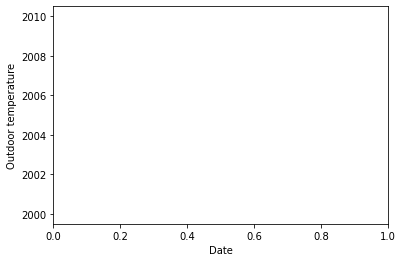

In [ ]:
plt.xlabel('Date')
plt.ylabel('Outdoor temperature')
plt.plot(df_outTemp)

In [ ]:
df_minutes = (df_outTemp.groupby([df_outTemp['Time'].dt.date, df_outTemp['Time'].dt.hour, df_outTemp['Time'].dt.minute])['Outside temperature']
            .sum()
            .unstack(fill_value=0))
print(df_minutes)

Time             0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Time       Time                                                               
2021-11-17 15.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           16.0   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   
           17.0   8.9   8.9   9.0   9.0   9.0   9.1   9.1   9.1   9.1   9.1   
           18.0   9.0   8.9   8.9   8.9   8.9   8.9   8.8   8.9   8.9   9.0   
           19.0   9.0   9.0   9.0   8.9   9.0   9.0   9.0   9.0   9.0   8.9   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-12-01 6.0    1.2   1.3   1.4   1.4   1.5   1.6   1.7   1.7   1.7   1.7   
           7.0    2.9   3.0   3.1   3.1   3.1   3.1   3.1   3.0   2.9   2.9   
           8.0    3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.2   3.2   3.2   
           9.0    3.9   4.0   4.0   4.1   4.2   4.1   4.1   4.1   4.1   4.1   
           10.0   4.5   4.5   4.5   0.0   0.0   0.0 

In [ ]:
df_minutes.shape

(9092, 60)

In [ ]:
df_minutes.head()

Time             0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Time       Time                                                               
2021-11-17 15.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           16.0   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   8.6   
           17.0   8.9   8.9   9.0   9.0   9.0   9.1   9.1   9.1   9.1   9.1   
           18.0   9.0   8.9   8.9   8.9   8.9   8.9   8.8   8.9   8.9   9.0   
           19.0   9.0   9.0   9.0   8.9   9.0   9.0   9.0   9.0   9.0   8.9   

Time             ...  50.0  51.0  52.0  53.0  54.0  55.0  56.0  57.0  58.0  \
Time       Time  ...                                                         
2021-11-17 15.0  ...   9.4   9.4   9.2   9.1   9.1   8.9   8.8   8.6   8.6   
           16.0  ...   8.6   8.8   8.8   8.9   8.9   8.8   8.9   8.9   8.9   
           17.0  ...   9.0   9.0   9.0   9.0   9.0   9.0   9.0   9.0   8.9   
           18.0  ...   8.9   8.9   8.6   8.7   8.7   8.8   8.7   8.8   9.0   
           19.0  ...   8.9   9.0   8.9   9.0   9.0   9.0   9.0   9.0   9.0   

Time             59.0  
Time       Time        
2021-11-17 15.0   8.6  
           16.0   9.0  
           17.0   8.9  
           18.0   9.0  
           19.0   9.1  

[5 rows x 60 columns]

<Figure size 2880x720 with 0 Axes>

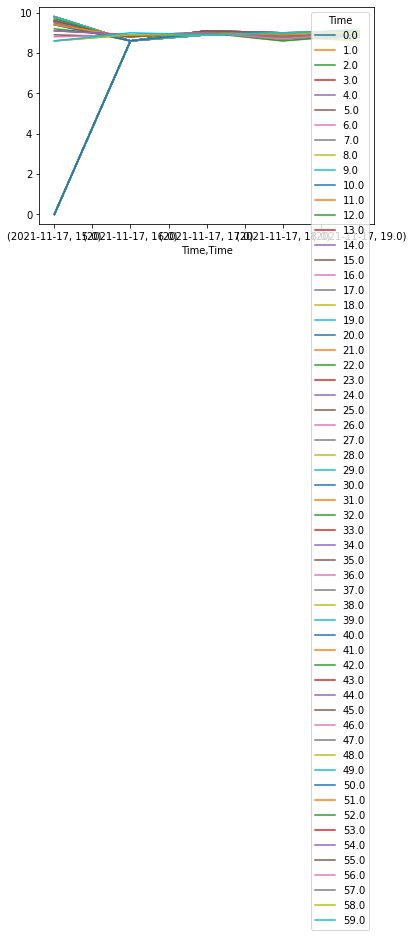

In [ ]:
#df_minutes.iloc[0:5,:].plot()

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
df_minutes.iloc[0:5,:].plot()

#plt.plot(df_minutes.iloc[0:10,:])

ConversionError: ignored

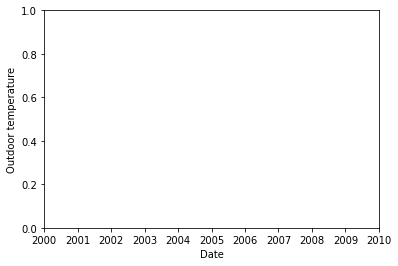

In [ ]:

plt.xlabel('Date')
plt.ylabel('Outdoor temperature')
plt.plot(df_minutes)

In [ ]:
df_outTemp.iloc[0:100,].plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f02faa8b160> (for post_execute):


ValueError: ignored

ValueError: ignored